In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_o = pd.read_csv('~/python3_script/machineLearning/house_price/houseprice_train.csv')

In [4]:
quantitative = [feature for feature in train_o.columns if train_o.dtypes[feature] != 'object'] # 定量变量
quantitative.remove('Id')
quantitative.remove('SalePrice')
qualitative = [feature for feature in train_o.columns if train_o.dtypes[feature] == 'object'] # 定性变量

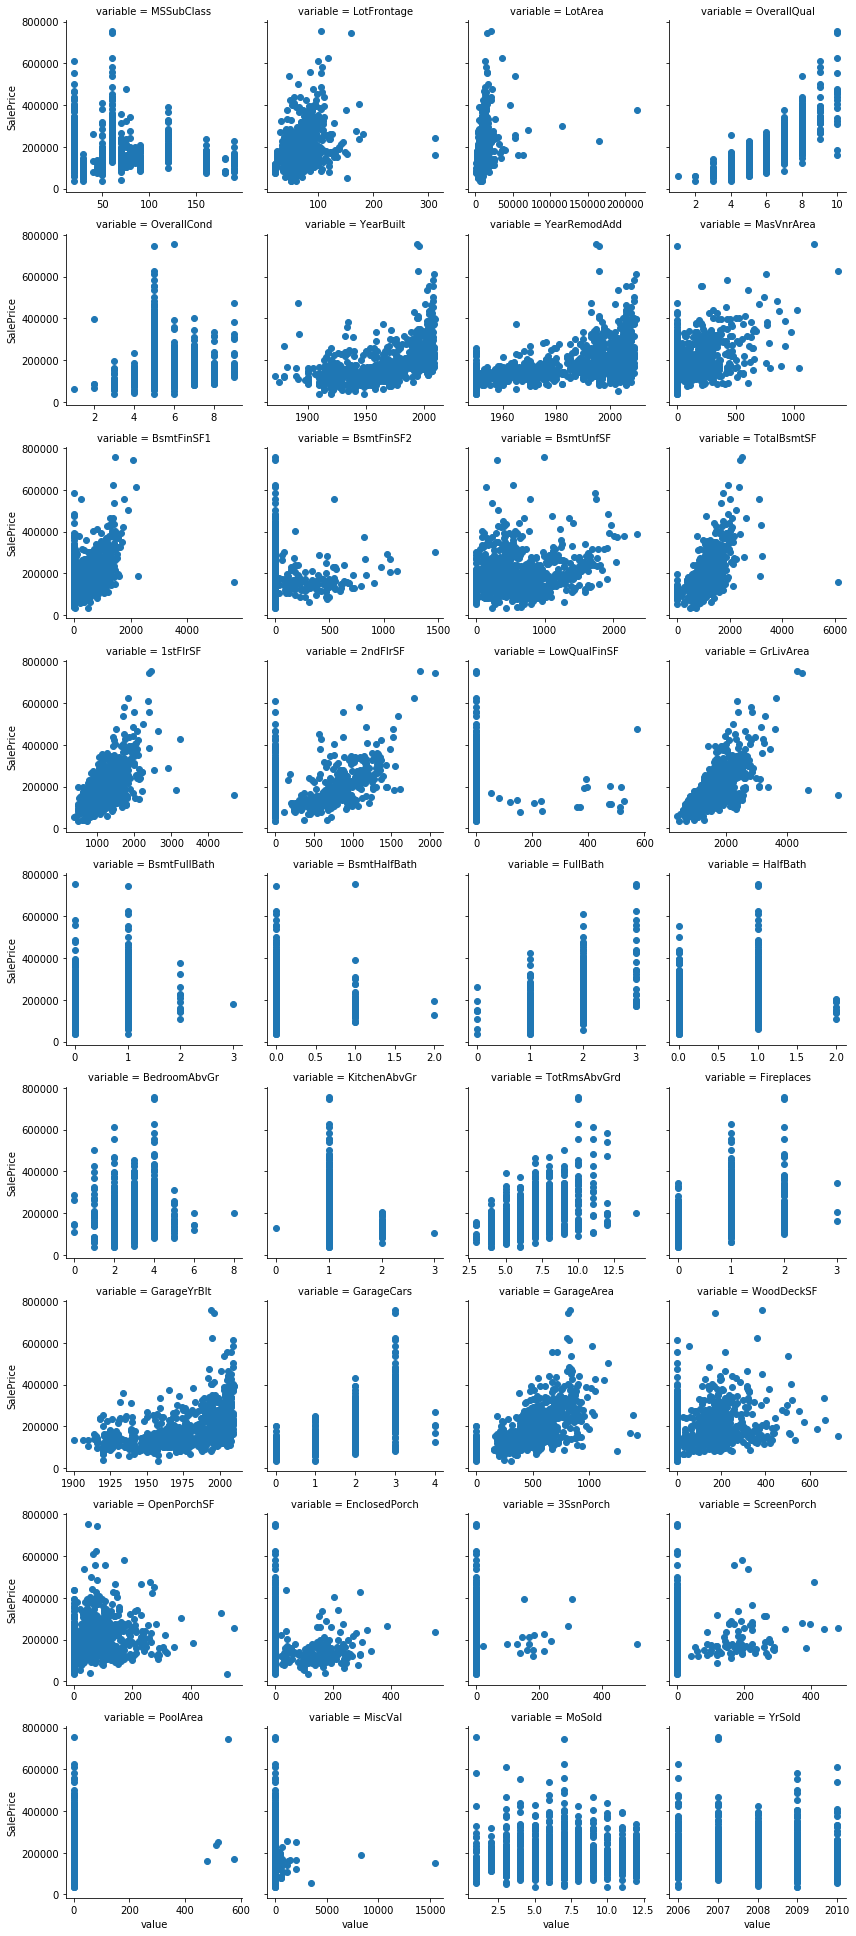

In [5]:
m_cont = pd.melt(train_o, id_vars='SalePrice', value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=True)
g.map(plt.scatter, 'value', 'SalePrice')

In [6]:
plt.show()

In [7]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering['val']
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature)['SalePrice'].mean()
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = np.arange(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict() # 返回的数据样例{category1:1, category2:2, ...}

    # 对frame[feature]编码
    for category, code_value in ordering.items():
        frame.loc[frame[feature]==category, feature+'_E'] = code_value

In [8]:
qual_encoded = []
for qual in qualitative:
    encode(train_o, qual)
    qual_encoded.append(qual+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


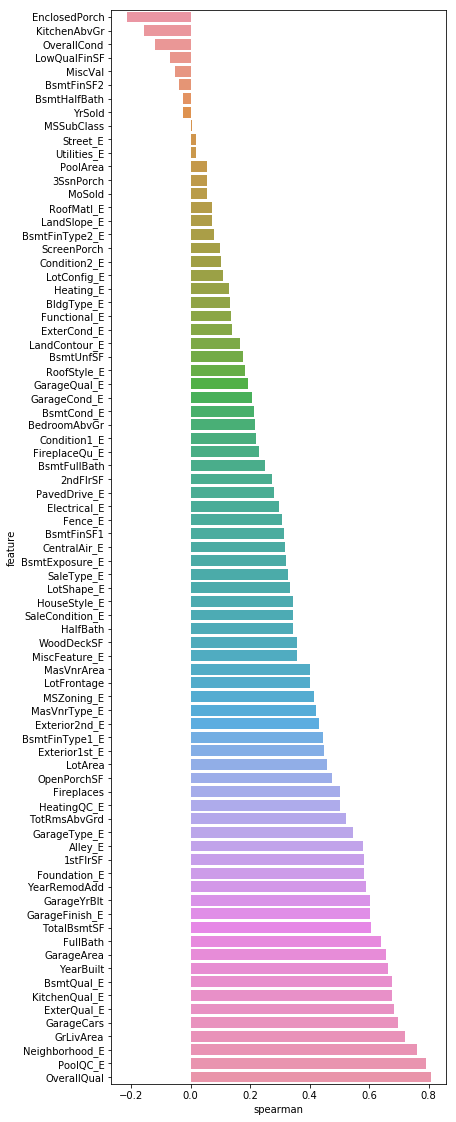

In [9]:
def spearman(frame, features):
    spr =  pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')

    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(x='spearman', y='feature', data=spr)
spearman(train_o, quantitative+qual_encoded)

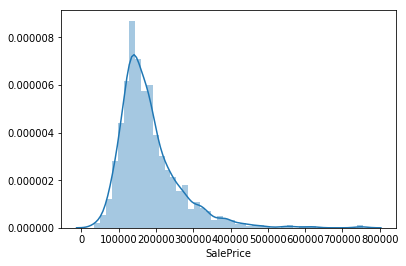

In [18]:
sns.distplot(train_o['SalePrice'])
plt.show()

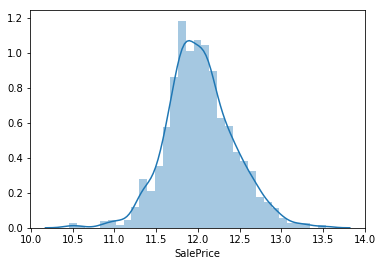

In [19]:
sns.distplot(np.log(train_o['SalePrice']))
plt.show()

In [25]:
def draw(x):
    print(train_o.groupby([x])['SalePrice'].agg(['count', 'mean', 'median']).sort_values('median'))
    plt.figure(figsize=(15,8))
    sns.boxplot(train_o[x], train_o.SalePrice)
    plt.show()

             count           mean    median
OverallQual                                
2                3   51770.333333   60000.0
1                1   61000.000000   61000.0
3               18   86976.388889   86250.0
4               91  108559.296703  108000.0
5              315  134026.815873  134000.0
6              291  159698.680412  159500.0
7              249  206316.939759  197900.0
8              139  276576.431655  274000.0
9               36  365252.805556  338821.5
10              17  441740.647059  438780.0


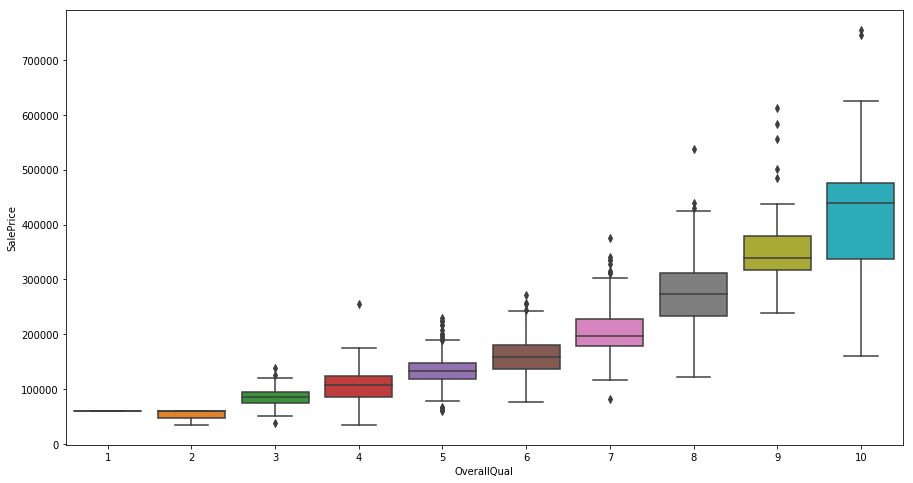

In [22]:
draw('OverallQual')

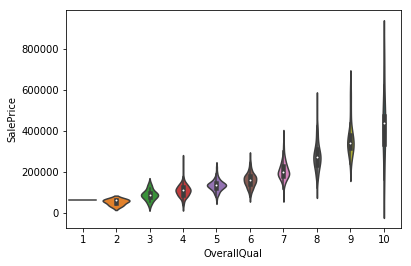

In [23]:
sns.violinplot(x='OverallQual', y="SalePrice",data=train_o)
plt.show()

           count           mean  median
YearBuilt                              
1930           8   99112.500000   89000
1913           1   90350.000000   90350
1927           2   91750.000000   91750
1875           1   94000.000000   94000
1945           3   97000.000000   98000
1922           7  108700.000000   99900
1941          13  106384.615385  105000
1898           1  106000.000000  106000
1900           9  116214.000000  106250
1926           8  120662.500000  108500
1935           6  161083.333333  108750
1920          24  115816.666667  109250
1924           5  110680.000000  109500
1938           4  109137.500000  109875
1912           2  111250.000000  111250
1910          12  109275.333333  115752
1925          13  126850.000000  117000
1947           5  117200.000000  118000
1954          19  134278.947368  119000
1950          14  123614.285714  119000
1939           7  146728.571429  119900
1971          18  130669.444444  121500
1872           1  122000.000000  122000


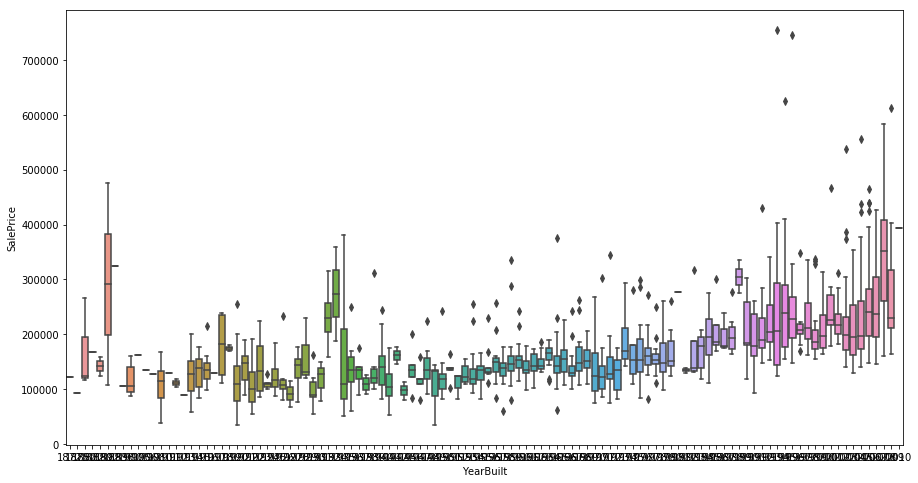

In [24]:
draw('YearBuilt')

        count           mean  median
PoolQC                              
not      1155  181182.925541  163000
Gd          2  165500.000000  165500
Fa          1  250000.000000  250000
Ex          2  490000.000000  490000


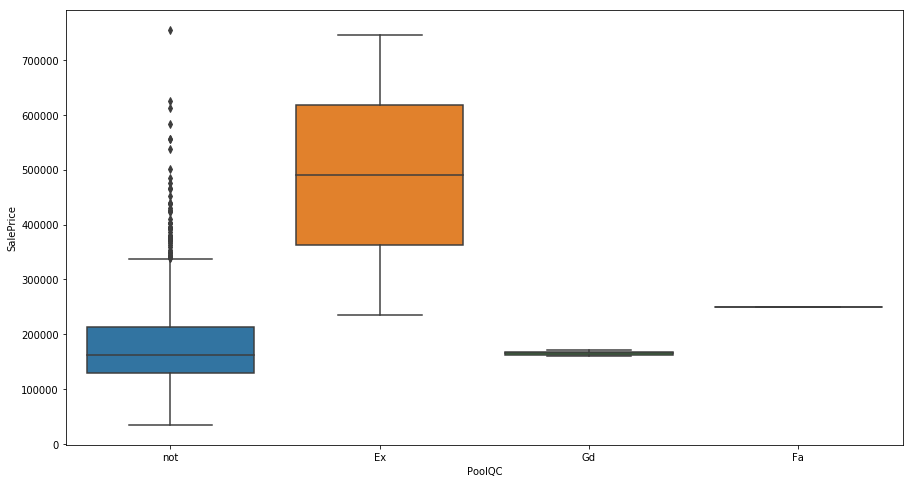

In [28]:
train_o.fillna('not', inplace=True)
draw('PoolQC')

          count           mean  median
MSZoning                              
C (all)       8   72660.875000   74700
RM          168  126065.886905  120000
RH           14  130852.428571  137000
RL          920  191817.255435  173000
FV           50  215262.280000  202925


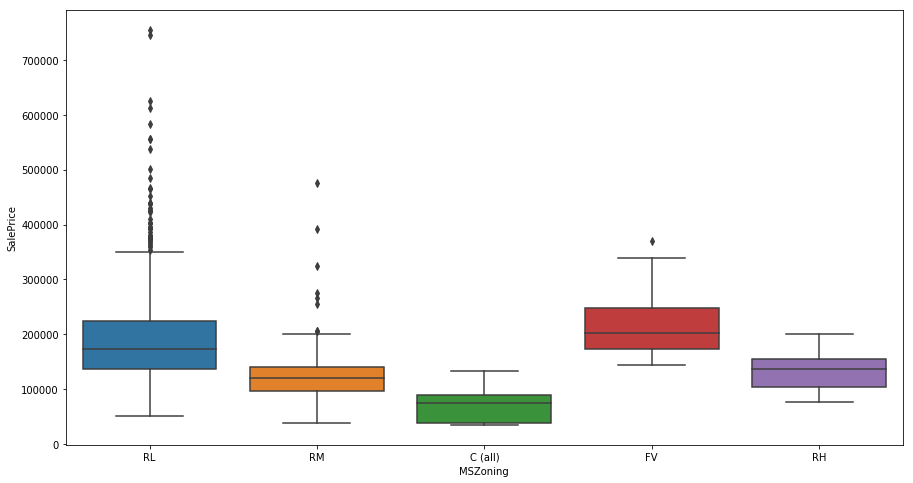

In [29]:
draw('MSZoning')

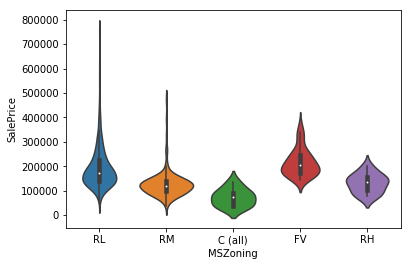

In [30]:
sns.violinplot(x='MSZoning', y="SalePrice",data=train_o)
plt.show()